In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('50_Startups.csv')

In [10]:
print(type(data))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
#Exploratory Data Analytics

correlation = data.corr()

C:\Users\Acer\AppData\Local\Temp/ipykernel_15992/307749493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


In [6]:
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

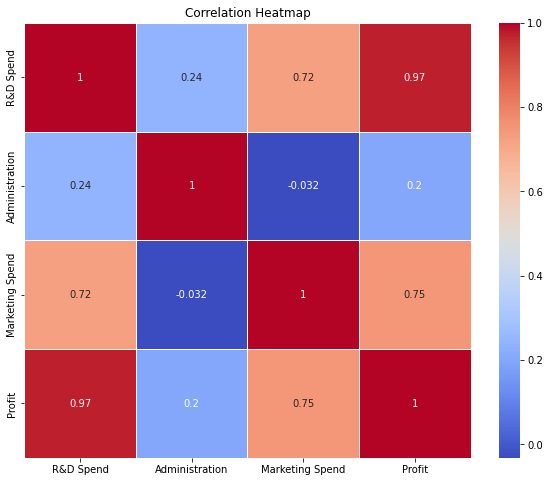

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [16]:
print(y)
print(X)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 9

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
labelencoder = LabelEncoder()

In [20]:
X[:, 3] = labelencoder.fit_transform(X[:, 3])

In [22]:
X1 = pd.DataFrame(X)
X1.head()



,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)

In [26]:
len(x_train)

35

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc_X = StandardScaler()

In [29]:
x_train = sc_X.fit_transform(x_train)

In [30]:
x_test = sc_X.transform(x_test)

In [31]:
sc_y = StandardScaler()

In [32]:
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [33]:
y_test = sc_y.fit_transform(y_test.reshape(-1,1))

In [34]:
print(x_test)

[[-0.1403821   2.28593993 -0.63280437  0.06401844]
 [ 0.5692117  -1.24096039  0.37552686 -1.05630426]
 [ 0.59465017 -0.51102691  0.21780907  0.06401844]
 [-0.92249538 -1.51579286 -0.27786722  0.06401844]
 [ 1.65079661 -0.87781077  1.58762665  0.06401844]
 [-0.01625436  0.15939469  1.16810991  1.18434114]
 [-1.07956593 -2.24414796 -0.11853428  1.18434114]
 [-0.24112469  1.1235571  -0.86213689  1.18434114]
 [ 0.02242149 -0.03787582  0.78603258  0.06401844]
 [ 1.41848712 -1.25644297  1.26760194  0.06401844]
 [-0.3567741  -0.80359112  0.10650537  0.06401844]
 [-0.55107837 -1.50272366  0.03664684  1.18434114]
 [ 0.04977002  0.79103569 -0.5109594   0.06401844]
 [-0.54263284  1.31734166  0.07710403 -1.05630426]
 [ 0.38632657 -0.37198959  0.7216716   0.06401844]]


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(x_test)

In [39]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.8730659928969577
Model Score/Performance on Training data 0.9515496105627431


In [40]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})

In [41]:
df

,Predicted value,Actual Value
0,-0.143449,-0.415234
1,0.519201,0.903694
2,0.544203,0.963644
3,-0.880879,-1.235473
4,1.614241,2.409756
5,0.103790,-0.359682
6,-1.016222,-1.125065
7,-0.273492,-0.601881
8,0.094609,-0.187676
9,1.368552,1.609508
